In [107]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import Data_prep
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# In this project we are trying to predict whether  customer will churn

## Studying data

In [139]:
df=pd.read_csv("Telco-Customer-Churn.csv") 

In [106]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='Contract', ylabel='count'>

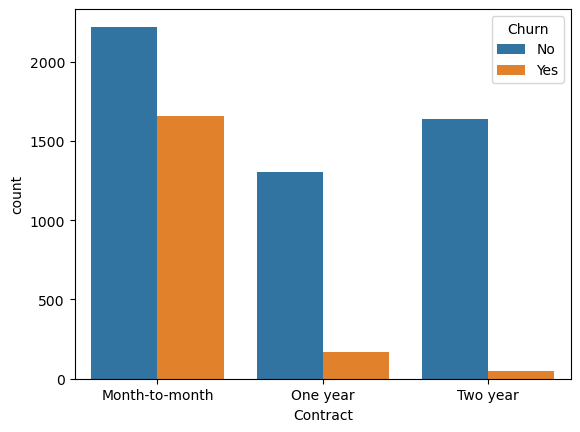

In [60]:
sns.countplot(data=df,x="Contract",hue="Churn")

In [65]:
#The longer the contract the less likely it is for customer to churn

<Axes: xlabel='Churn', ylabel='count'>

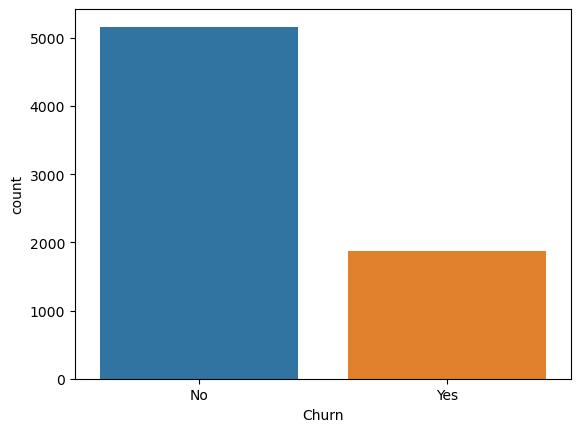

In [63]:
sns.countplot(data=df,x="Churn")

In [64]:
#We don'e have big disproportionality between "No" and "Yes"

<Axes: xlabel='Churn', ylabel='tenure'>

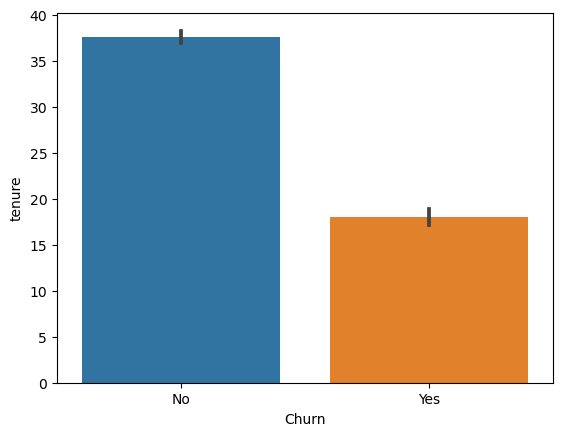

In [66]:
sns.barplot(data=df,y="tenure",x="Churn")

In [67]:
#The customers that don't churn have higher average tenure

In [68]:
#Lets choose some of the features to study the correlation of churn with them

In [78]:
df_sel=df[['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [79]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Churn             7032 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   PhoneService      7032 non-null   object
 6   MultipleLines     7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  InternetService   7032 non-null   object
 12  StreamingTV       7032 non-null   object
 13  StreamingMovies   7032 non-null   object
 14  Contract          7032 non-null   object
 15  PaperlessBilling  7032 non-null   object
 16  PaymentMethod     7032 non-null   object
dtypes: int64(1), o

In [85]:
df_corr=pd.get_dummies(df_sel).corr()["Churn_Yes"]

In [86]:
df_corr

SeniorCitizen                              0.150541
Churn_No                                  -1.000000
Churn_Yes                                  1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
OnlineSecurity_No                          0.342235
OnlineSecurity_No internet service        -0.227578
OnlineSecurity_Yes                        -0.171270
OnlineBackup_No                            0.267595
OnlineBackup_No internet service          -0.227578
OnlineBackup

In [88]:
df_corr_plot=df_corr.drop(["Churn_Yes","Churn_No"]).sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Contract_Two year'),
  Text(1, 0, 'StreamingTV_No internet service'),
  Text(2, 0, 'OnlineBackup_No internet service'),
  Text(3, 0, 'TechSupport_No internet service'),
  Text(4, 0, 'OnlineSecurity_No internet service'),
  Text(5, 0, 'InternetService_No'),
  Text(6, 0, 'StreamingMovies_No internet service'),
  Text(7, 0, 'DeviceProtection_No internet service'),
  Text(8, 0, 'PaperlessBilling_No'),
  Text(9, 0, 'Contract_One year'),
  Text(10, 0, 'OnlineSecurity_Yes'),
  Text(11, 0, 'TechSupport_Yes'),
  Text(12, 0, 'Dependents_Yes'),
  Text(13, 0, 'Partner_Yes'),
  Text(14, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(15, 0, 'InternetService_DSL'),
  Text(16, 0, 'PaymentMethod_Bank transfer (automatic)'),
  Text(17, 0, 'PaymentMethod_Mailed check'),
  Text(18, 0, 'OnlineBack

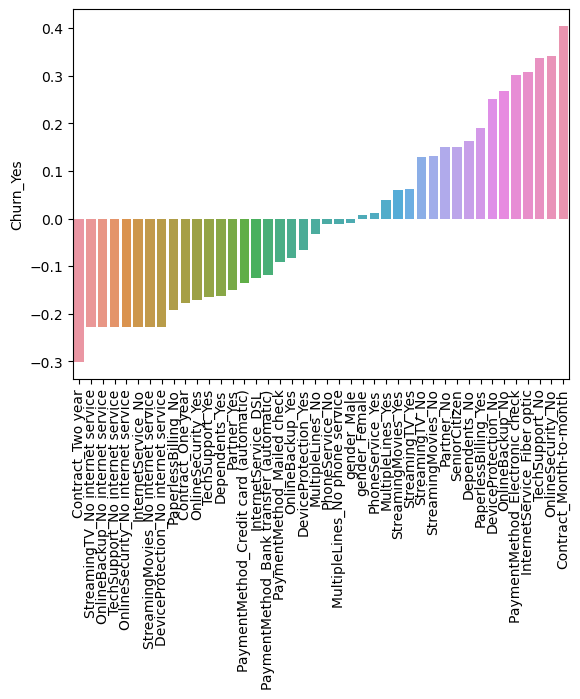

In [89]:
sns.barplot(x=df_corr_plot.index,y=df_corr_plot)
plt.xticks(rotation=90)

In [90]:
#We can see the features with highest correlation with "Churn_Yes" label on the very left and right sides

## Creating a model for classification

In [144]:
X=df.drop("Churn",axis=1)
y=df["Churn"]
X=pd.get_dummies(X,drop_first=True)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [162]:
def Run_classif(model,param_grid,X_train,y_train,X_test,y_test):

    grid=GridSearchCV(model,param_grid)
    grid.fit(X_train,y_train)
    print("Best parmeters from Grid Search are: {}".format(grid.best_params_))
    print("Feature importances are: {}".format(grid.best_estimator_.feature_importances_))

    y_pred=grid.predict(X_test)
    print("Error is {}".format(1-accuracy_score(y_pred,y_test)))
    print(classification_report(y_pred,y_test))
    ConfusionMatrixDisplay.from_predictions(y_pred,y_test)
    

# Decision tree

In [154]:
#DecisionTreeClassifier(max_leaf_nodes=3) #restrict to three terminal nodes
#DecisionTreeClassifier(max_depth=3)
#rfc=RandomForestClassifier(n_estimators=10,max_features="auto",random_state=101) # to use same random fetures set random_state
#model=AdaBoostClassifier(n_estimators=1)
#model=GradienBoostClassifier()
#param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.01,0.2],"max_depth":[3,4,5]}

model=DecisionTreeClassifier()
param_grid={"max_leaf_nodes":[3,5,10],"max_depth":[5,10,20]} #restrict to three terminal nodes and max depth


Best parmeters from Grid Search are: {'max_depth': 5, 'max_leaf_nodes': 10}
Error is 0.21542438604049974
              precision    recall  f1-score   support

          No       0.85      0.86      0.85      1691
         Yes       0.61      0.59      0.60       630

    accuracy                           0.78      2321
   macro avg       0.73      0.72      0.72      2321
weighted avg       0.78      0.78      0.78      2321



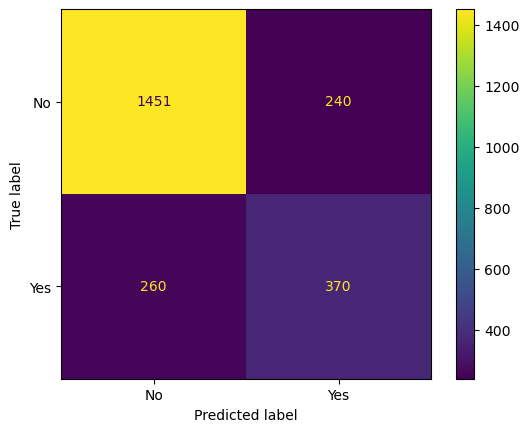

In [155]:
Run_classif(model,param_grid,X_train,y_train,X_test,y_test)

# Random Forest

In [160]:
model=RandomForestClassifier()
param_grid={"n_estimators":[10,50,100],"max_features":["sqrt", "log2", None]}

Best parmeters from Grid Search are: {'max_features': 'log2', 'n_estimators': 50}
Error is 0.20896165445928483
              precision    recall  f1-score   support

          No       0.92      0.82      0.87      1922
         Yes       0.43      0.66      0.52       399

    accuracy                           0.79      2321
   macro avg       0.67      0.74      0.69      2321
weighted avg       0.84      0.79      0.81      2321



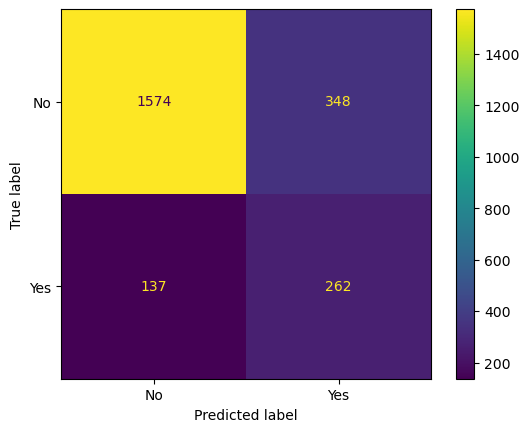

In [161]:
Run_classif(model,param_grid,X_train,y_train,X_test,y_test)

# Gradient Boost Classifier

In [169]:
model=GradientBoostingClassifier()
param_grid={"n_estimators":[50,100],"learning_rate":[0.1],"max_depth":[3,5]}

Best parmeters from Grid Search are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Feature importances are: [0.00664516 0.32746282 0.03328221 ... 0.00095731 0.06968096 0.00054085]
Error is 0.19862128392934075
              precision    recall  f1-score   support

          No       0.91      0.83      0.87      1874
         Yes       0.49      0.67      0.56       447

    accuracy                           0.80      2321
   macro avg       0.70      0.75      0.72      2321
weighted avg       0.83      0.80      0.81      2321



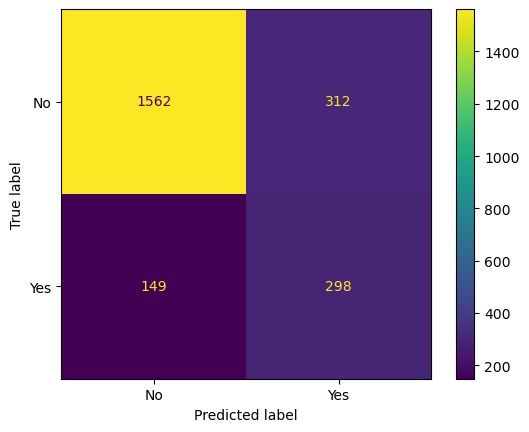

In [170]:
Run_classif(model,param_grid,X_train,y_train,X_test,y_test)

In [ ]:
#All  three models give similar performance